In [44]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils


In [2]:
a_z=pd.read_csv('a_z.csv')

In [3]:
a_z.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
a_z.rename(columns={'0':'label'}, inplace=True)
print(label_size := a_z.groupby('label').size())
display(a_z.head())
a_z.shape

label
0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
dtype: int64


,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(372450, 785)

In [5]:
X=a_z.drop('label',axis = 1)
Y=a_z['label']

In [6]:
display(X.head())
display(Y.head())

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [7]:
X.shape

(372450, 784)

first 20 0f these


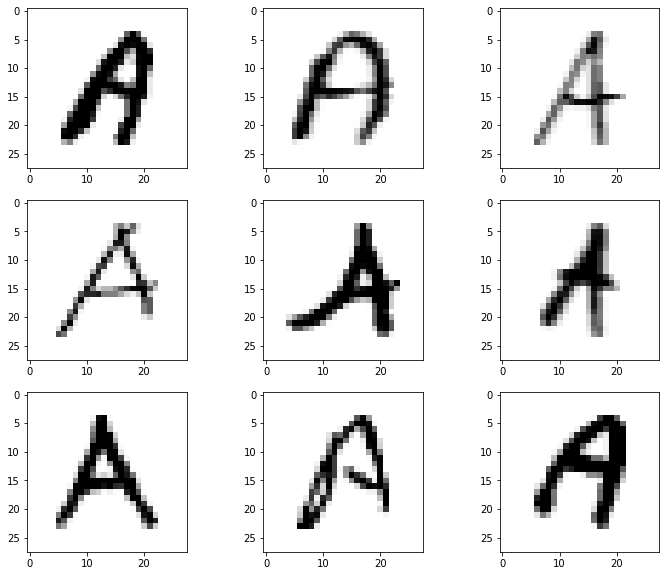



 Random 16


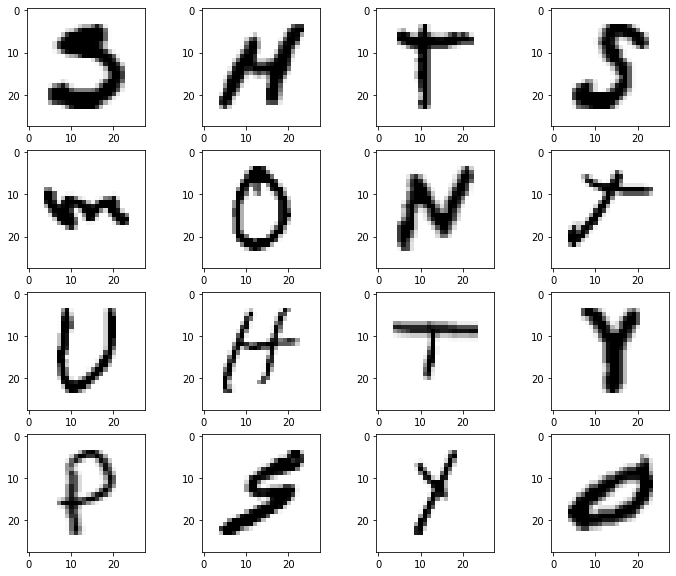

In [8]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X)
print('first 20 0f these')
plt.figure(figsize = (12,10))
row, colums = 3, 3
for i in range(9):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()
print('\n\n','Random 16')
plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [9]:
a_zC=a_z
(a_z_mapper:={i:chr(65+i) for i in range(26)})
a_z['label'] = a_z['label'].map(a_z_mapper)
display(a_z.head())
(label_size := a_z.groupby('label').size())

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


label
A    13869
B     8668
C    23409
D    10134
E    11440
F     1163
G     5762
H     7218
I     1120
J     8493
K     5603
L    11586
M    12336
N    19010
O    57825
P    19341
Q     5812
R    11566
S    48419
T    22495
U    29008
V     4182
W    10784
X     6272
Y    10859
Z     6076
dtype: int64

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [33]:
Scaler=preprocessing.MinMaxScaler()
Scaler.fit(X_train)
X_train=Scaler.transform(X_train)
X_test=Scaler.transform(X_test)

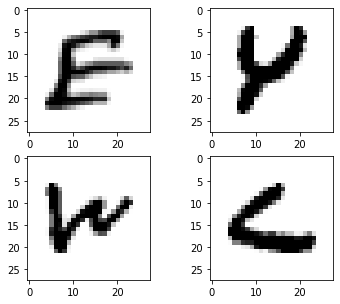

In [38]:
plt.figure(figsize = (6,5))
row, colums = 2,2
for i in range(4):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_train[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [45]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Y_train = keras.utils.np_utils.to_categorical(Y_train)
Y_test = keras.utils.np_utils.to_categorical(Y_test)

In [56]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(Y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,Y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
1397/1397 - 109s - loss: 0.2472 - accuracy: 0.9315 - val_loss: 0.0999 - val_accuracy: 0.9722
Epoch 2/18
1397/1397 - 110s - loss: 0.0898 - accuracy: 0.9748 - val_loss: 0.0688 - val_accuracy: 0.9813
Epoch 3/18
1397/1397 - 107s - loss: 0.0682 - accuracy: 0.9807 - val_loss: 0.0664 - val_accuracy: 0.9817
Epoch 4/18
1397/1397 - 108s - loss: 0.0547 - accuracy: 0.9840 - val_loss: 0.0530 - val_accuracy: 0.9850
Epoch 5/18
1397/1397 - 108s - loss: 0.0456 - accuracy: 0.9867 - val_loss: 0.0482 - val_accuracy: 0.9865
Epoch 6/18
1397/1397 - 109s - loss: 0.0380 - accuracy: 0.9885 - val_loss: 0.0447 - val_accuracy: 0.9878
Epoch 7/18
1397/1397 - 109s - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 8/18
1397/1397 - 109s - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 9/18
1397/1397 - 107s - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0363 - val_accuracy: 0.9908
Epoch 10/18
1397/1397 - 107s - loss: 0.0229 - accuracy: 0.9926 -

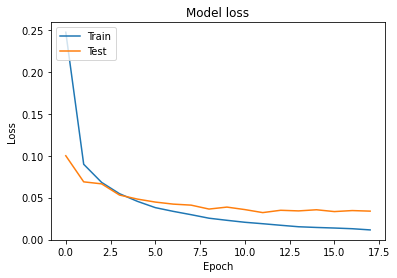

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [60]:
cls.save('model.h5')

In [61]:
!pip install -U coremltools
import coremltools

  Created wheel for coremltools: filename=coremltools-4.1-py3-none-any.whl size=1038611 sha256=a2be659ca4082141a2acfbe16f8dcc0e6af529e4464da42af30667a3bfa97ad3
  Stored in directory: c:\users\dheer\appdata\local\pip\cache\wheels\bc\88\ba\caaa3cfd7a0706e06d73b6295364dee0fcae92aff37cabee4a
  Created wheel for attr: filename=attr-0.3.1-py3-none-any.whl size=2462 sha256=0320a6bf32da3941244dfc64f5a744f7d6385b6bd02153cc6a2bfabc29b8589c
  Stored in directory: c:\users\dheer\appdata\local\pip\cache\wheels\47\53\81\061bfd275ab8eb923cfe874f1f6cbe1e607092df09d606c982
Successfully built coremltools attr
